# ABBA-BABA Test using AOcol as third group for <i>An.coluzii</i> populations
In this notebook I performed the ABBA-BABA Test using the new outgroup allele counts <b>(see 09112019_outgroup_allele_count_phase2_dataset_creation)</b> and the new allele count dataset for the phase2.

I have used part of <b>Alistair's notebook (20150529 Admixture, introgression.ipynb)</b> on the Ag1000G github repository

-------------------

Loading modules and callsets paths:

In [3]:
%run imports.ipynb

/opt/conda/lib/python3.6/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [4]:
chromosomes = ['3L', '3R', '2L', '2R', 'X']

In [5]:
out_species = ['arab', 'chri', 'epir', 'mela', 'meru', 'quad']

In [6]:
an_col = 'BFcol', 'CIcol', 'GHcol', 'GNcol'

In [7]:
calldata_out= zarr.open('data/outgroup_alleles_phase2.zarr')
calldata_out.tree()

/
 ├── 2L
 │   ├── arab (8906423, 2) int32
 │   ├── chri (8906423, 2) int32
 │   ├── epir (8906423, 2) int32
 │   ├── mela (8906423, 2) int32
 │   ├── meru (8906423, 2) int32
 │   └── quad (8906423, 2) int32
 ├── 2R
 │   ├── arab (12047846, 2) int32
 │   ├── chri (12047846, 2) int32
 │   ├── epir (12047846, 2) int32
 │   ├── mela (12047846, 2) int32
 │   ├── meru (12047846, 2) int32
 │   └── quad (12047846, 2) int32
 ├── 3L
 │   ├── arab (7897666, 2) int32
 │   ├── chri (7897666, 2) int32
 │   ├── epir (7897666, 2) int32
 │   ├── mela (7897666, 2) int32
 │   ├── meru (7897666, 2) int32
 │   └── quad (7897666, 2) int32
 ├── 3R
 │   ├── arab (10752701, 2) int32
 │   ├── chri (10752701, 2) int32
 │   ├── epir (10752701, 2) int32
 │   ├── mela (10752701, 2) int32
 │   ├── meru (10752701, 2) int32
 │   └── quad (10752701, 2) int32
 └── X
     ├── arab (4472265, 2) int32
     ├── chri (4472265, 2) int32
     ├── epir (4472265, 2) int32
     ├── mela (4472265, 2) int32
     ├── meru (4472265, 2) int32
     └── quad (4472265, 2) int32

In [8]:
calldata_biallel= zarr.open('data/phase2_biallel_allele_count.zarr')
calldata_biallel.tree()

/
 ├── .zarr
 ├── 2L
 │   ├── AOcol (8906423, 2) int32
 │   ├── BFcol (8906423, 2) int32
 │   ├── BFgam (8906423, 2) int32
 │   ├── CIcol (8906423, 2) int32
 │   ├── CMgam (8906423, 2) int32
 │   ├── FRgam (8906423, 2) int32
 │   ├── GAgam (8906423, 2) int32
 │   ├── GHcol (8906423, 2) int32
 │   ├── GHgam (8906423, 2) int32
 │   ├── GM (8906423, 2) int32
 │   ├── GNcol (8906423, 2) int32
 │   ├── GNgam (8906423, 2) int32
 │   ├── GQgam (8906423, 2) int32
 │   ├── GW (8906423, 2) int32
 │   ├── KE (8906423, 2) int32
 │   └── UGgam (8906423, 2) int32
 ├── 2R
 │   ├── AOcol (12047846, 2) int32
 │   ├── BFcol (12047846, 2) int32
 │   ├── BFgam (12047846, 2) int32
 │   ├── CIcol (12047846, 2) int32
 │   ├── CMgam (12047846, 2) int32
 │   ├── FRgam (12047846, 2) int32
 │   ├── GAgam (12047846, 2) int32
 │   ├── GHcol (12047846, 2) int32
 │   ├── GHgam (12047846, 2) int32
 │   ├── GM (12047846, 2) int32
 │   ├── GNcol (12047846, 2) int32
 │   ├── GNgam (12047846, 2) int32
 │   ├── GQgam (12047846, 2) int32
 │   ├── GW (12047846, 2) int32
 │   ├── KE (12047846, 2) int32
 │   └── UGgam (12047846, 2) int32
 ├── 3L
 │   ├── AOcol (7897666, 2) int32
 │   ├── BFcol (7897666, 2) int32
 │   ├── BFgam (7897666, 2) int32
 │   ├── CIcol (7897666, 2) int32
 │   ├── CMgam (7897666, 2) int32
 │   ├── FRgam (7897666, 2) int32
 │   ├── GAgam (7897666, 2) int32
 │   ├── GHcol (7897666, 2) int32
 │   ├── GHgam (7897666, 2) int32
 │   ├── GM (7897666, 2) int32
 │   ├── GNcol (7897666, 2) int32
 │   ├── GNgam (7897666, 2) int32
 │   ├── GQgam (7897666, 2) int32
 │   ├── GW (7897666, 2) int32
 │   ├── KE (7897666, 2) int32
 │   └── UGgam (7897666, 2) int32
 ├── 3R
 │   ├── AOcol (10752701, 2) int32
 │   ├── BFcol (10752701, 2) int32
 │   ├── BFgam (10752701, 2) int32
 │   ├── CIcol (10752701, 2) int32
 │   ├── CMgam (10752701, 2) int32
 │   ├── FRgam (10752701, 2) int32
 │   ├── GAgam (10752701, 2) int32
 │   ├── GHcol (10752701, 2) int32
 │   ├── GHgam (10752701, 2) int32
 │   ├── GM (10752701, 2) int32
 │   ├── GNcol (10752701, 2) int32
 │   ├── GNgam (10752701, 2) int32
 │   ├── GQgam (10752701, 2) int32
 │   ├── GW (10752701, 2) int32
 │   ├── KE (10752701, 2) int32
 │   └── UGgam (10752701, 2) int32
 └── X
     ├── AOcol (4472265, 2) int32
     ├── BFcol (4472265, 2) int32
     ├── BFgam (4472265, 2) int32
     ├── CIcol (4472265, 2) int32
     ├── CMgam (4472265, 2) int32
     ├── FRgam (4472265, 2) int32
     ├── GAgam (4472265, 2) int32
     ├── GHcol (4472265, 2) int32
     ├── GHgam (4472265, 2) int32
     ├── GM (4472265, 2) int32
     ├── GNcol (4472265, 2) int32
     ├── GNgam (4472265, 2) int32
     ├── GQgam (4472265, 2) int32
     ├── GW (4472265, 2) int32
     ├── KE (4472265, 2) int32
     └── UGgam (4472265, 2) int32

In [9]:
metadata = pd.read_csv("samples.meta.txt", sep="\t")
metadata.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


Create dictionary for caching allele counts and populations data:

In [10]:
ac_cache = dict()

def load_ac(chrom, pop):
    if (chrom, pop) in ac_cache:
        return ac_cache[chrom, pop]
    else:
        if pop in out_species:
            ac = calldata_out[chrom][pop]
        else:
            ac = calldata_biallel[chrom][pop]
            ac_cache[chrom, pop] = ac
        return ac

In [11]:
fourpop_cache = dict()

Define functions for run the ABBA-BABA test with populations and plot results:

In [12]:
#this is the function that perform the test
def f4_analysis(chrom, A, B, C, D, blen=100000, plot=False, ax=None):
    
    key = (chrom, A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = load_ac(chrom, A)
        acb = load_ac(chrom, B)
        acc = load_ac(chrom, C)
        acd = load_ac(chrom, D)

        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

#this is the function that give me to display multiple tests on a table
def f4_analyses(As, Bs, Cs, Ds, chroms=chromosomes, blen=100000):
    
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]
    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, _, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                                row = [chrom, test, d, d_se, d_z]
                                tbl += [row]
    
    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))

#these are the function for visualizing the test along the genome    
def f4_plot(chrom, A, B, C, D, blen=100000, ax=None, ylim=(-.6, .6)):
    d, d_se, d_z, d_vb, d_vj = f4_analysis(chrom, A, B, C, D, blen=blen)

    # load variant positions
    pos = callset_biallel[chrom]['variants']['POS'][:]

    block_starts = allel.moving_statistic(pos, statistic=np.min, size=blen)
    block_stops = allel.moving_statistic(pos, statistic=np.max, size=blen)
    block_widths = block_stops - block_starts

    if ax is None:
        fig, ax = subplots(figsize=(7, 2))
    ax.bar(block_starts, d_vb, width=block_widths, linewidth=0)
    ax.axhline(0, color='k', linestyle='--')
    ax.set_ylabel('D', rotation=0, ha='center', va='center')
    ax.set_ylim(*ylim)
    
    return ax

    
def f4_fig(A, B, C, D, blen=100000, ylim=(-.6, .6)):
    gf = GenomeFigure(genome, figsize=(8, 5))
    gf.apply(lambda chrom, ax: f4_plot(chrom, A, B, C, D, ax=ax, ylim=ylim))
    gf.fig.suptitle('D(%s, %s; %s, %s)' % (A, B, C, D), fontsize=12, fontweight='bold')
    gf.fig.tight_layout()
    return gf


-----------------------------------------

## ABBA-BABA Test with Angola for <i>AN.coluzzii</i> populations

### Using <i>An.christyi</i> as outgroup:

In [13]:
A = an_col
B = an_col
C = 'AOcol'
D = 'chri'

In [14]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(BFcol, CIcol; AOcol, chri)",0.000,0.0013,0.1
3L,"D(BFcol, GHcol; AOcol, chri)",-0.002,0.0012,-2.0
3L,"D(BFcol, GNcol; AOcol, chri)",0.012,0.0034,3.5
3L,"D(CIcol, BFcol; AOcol, chri)",-0.000,0.0013,-0.1
3L,"D(CIcol, GHcol; AOcol, chri)",-0.003,0.0009,-3.0
3L,"D(CIcol, GNcol; AOcol, chri)",0.012,0.0032,3.7
3L,"D(GHcol, BFcol; AOcol, chri)",0.002,0.0012,2.0
3L,"D(GHcol, CIcol; AOcol, chri)",0.003,0.0009,3.0
3L,"D(GHcol, GNcol; AOcol, chri)",0.014,0.0033,4.3
3L,"D(GNcol, BFcol; AOcol, chri)",-0.012,0.0034,-3.5


### Using <i>An.melas</i> as outgroup:

In [15]:
A = an_col
B = an_col
C = 'AOcol'
D = 'mela'

In [16]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(BFcol, CIcol; AOcol, mela)",0.001,0.0013,1.0
3L,"D(BFcol, GHcol; AOcol, mela)",-0.002,0.0014,-1.7
3L,"D(BFcol, GNcol; AOcol, mela)",0.019,0.0041,4.6
3L,"D(CIcol, BFcol; AOcol, mela)",-0.001,0.0013,-1.0
3L,"D(CIcol, GHcol; AOcol, mela)",-0.004,0.0008,-4.5
3L,"D(CIcol, GNcol; AOcol, mela)",0.018,0.0039,4.6
3L,"D(GHcol, BFcol; AOcol, mela)",0.002,0.0014,1.7
3L,"D(GHcol, CIcol; AOcol, mela)",0.004,0.0008,4.5
3L,"D(GHcol, GNcol; AOcol, mela)",0.022,0.0041,5.3
3L,"D(GNcol, BFcol; AOcol, mela)",-0.019,0.0041,-4.6


### Using <i>An.arabiensis</i> as outgroup:

In [17]:
A = an_col
B = 'AOcol'
C = an_col
D = 'arab'

In [18]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(BFcol, AOcol; BFcol, arab)",0.058,0.0158,3.6
3L,"D(BFcol, AOcol; CIcol, arab)",0.018,0.0103,1.7
3L,"D(BFcol, AOcol; GHcol, arab)",0.012,0.0099,1.2
3L,"D(BFcol, AOcol; GNcol, arab)",0.013,0.0085,1.5
3L,"D(CIcol, AOcol; BFcol, arab)",0.025,0.0102,2.4
3L,"D(CIcol, AOcol; CIcol, arab)",0.082,0.0084,9.8
3L,"D(CIcol, AOcol; GHcol, arab)",0.053,0.0091,5.9
3L,"D(CIcol, AOcol; GNcol, arab)",0.057,0.0087,6.5
3L,"D(GHcol, AOcol; BFcol, arab)",0.022,0.0102,2.2
3L,"D(GHcol, AOcol; CIcol, arab)",0.056,0.0093,6.0


----------------------------------

## Representing ABBA-BABA Test for each block with its mean and percentile.


In [31]:
def plot_test(chroms, As,Bs,Cs,Ds, blen=100000):
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    tbl = []
    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, b1, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                                row = b1
                                tbl += [row]
    tbl=np.array(tbl)
    #print (tbl)
    fig, ax = plt.subplots(figsize=(14, 4))
    # median
    pos = callset_biallel[chrom]['variants']['POS'][:]
    windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=blen)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(tbl, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[1]) 
    
    #min and max
    y5 = np.max(tbl, axis=0)
    y6 = np.min(tbl, axis=0)
    ax.fill_between(x, y5, y6,label = "min and max", color=palette[3], alpha=.4)
    
    # interquartile range
    y1 = np.percentile(tbl, 25, axis=0)
    y2 = np.percentile(tbl, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[0], alpha=.6)
    # 5-95 range
    y3 = np.percentile(tbl, 5, axis=0)
    y4 = np.percentile(tbl, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[2], alpha=.4)

    
    ax.set_title(('ABBA BABA Test between Acol populations vs %s and %s populations on chromosome %s') % (C,D, chrom))
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(0, pos.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()
    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()

-----------------------------------------------------------

## Block analysis using <i>An.christyi</i> as outgroup:

In [34]:
A = an_col
B = an_col
C = 'AOcol'
D = 'chri'

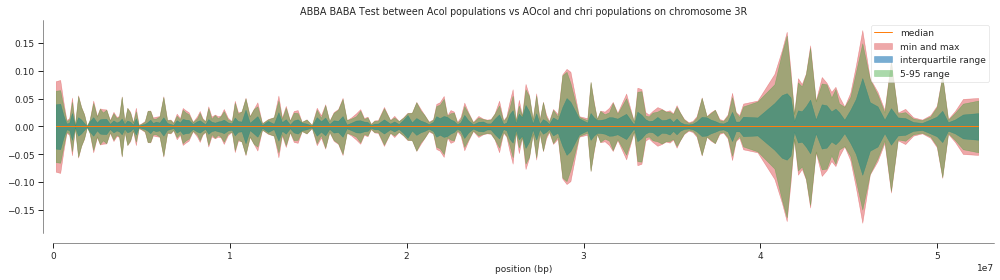

In [35]:
plot_test('3R', A,B,C,D, blen=50000)

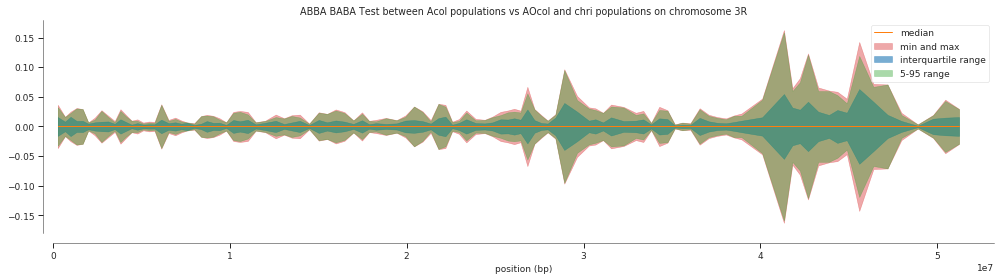

In [36]:
plot_test('3R', A,B,C,D, blen=100000)

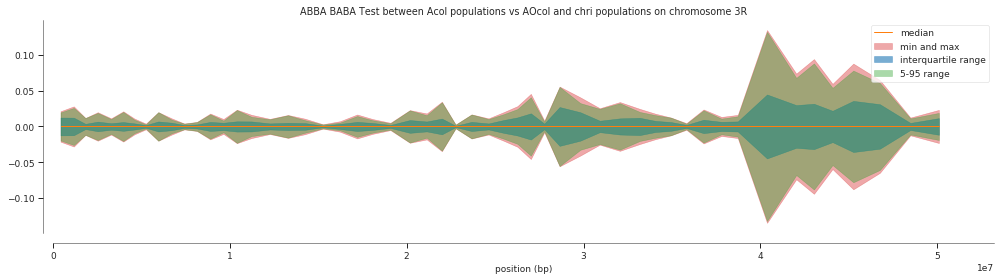

In [37]:
plot_test('3R', A,B,C,D, blen=200000)

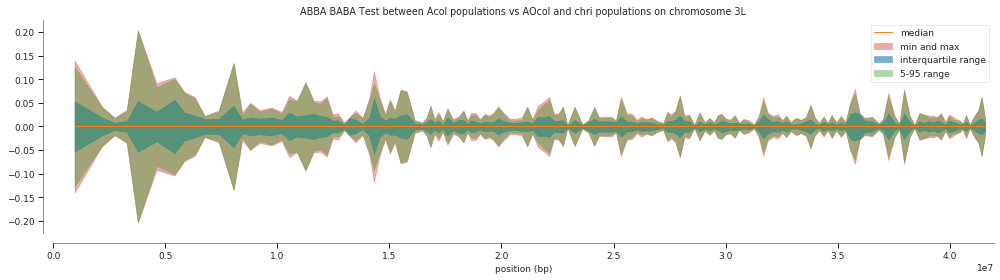

In [38]:
plot_test('3L', A,B,C,D, blen=50000)

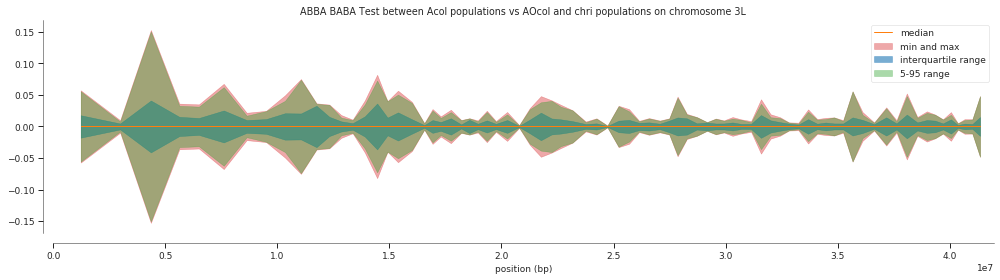

In [39]:
plot_test('3L', A,B,C,D, blen=100000)

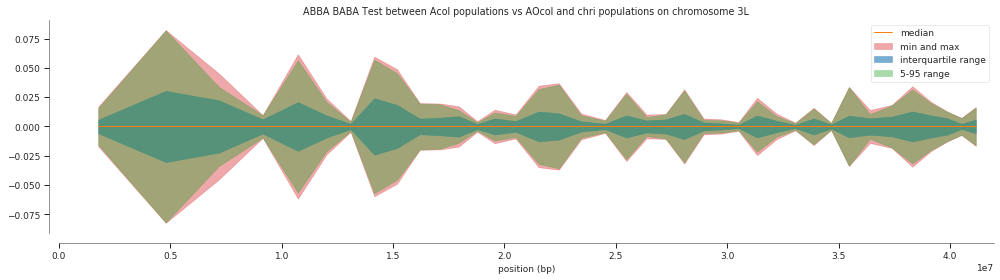

In [40]:
plot_test('3L', A,B,C,D, blen=200000)

## Block analysis using <i>An.christyi</i> as outgroup:

In [41]:
A = an_col
B = an_col
C = 'AOcol'
D = 'mela'

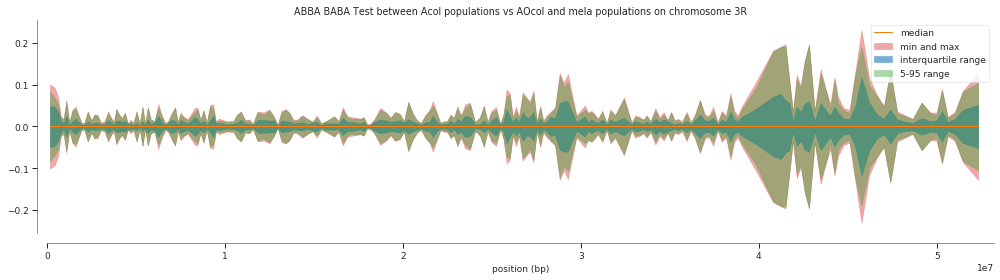

In [42]:
plot_test('3R', A,B,C,D, blen=50000)

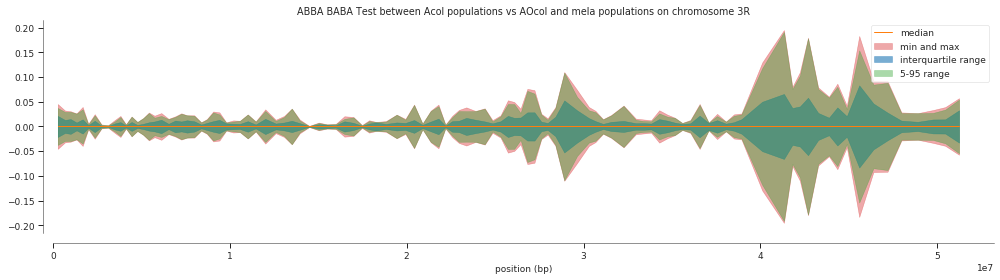

In [43]:
plot_test('3R', A,B,C,D, blen=100000)

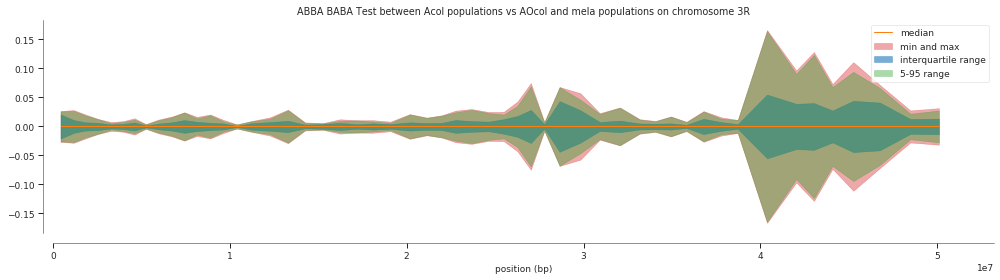

In [44]:
plot_test('3R', A,B,C,D, blen=200000)

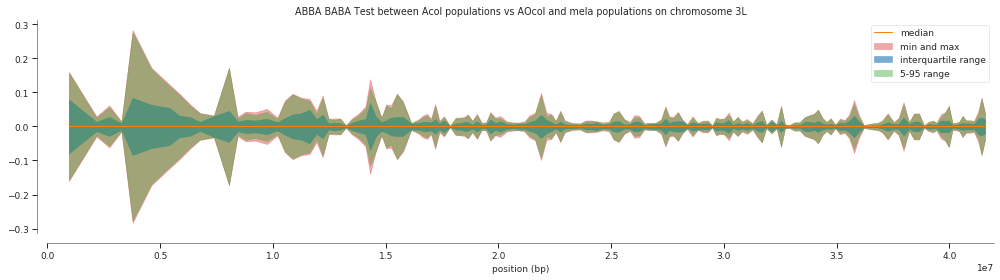

In [45]:
plot_test('3L', A,B,C,D, blen=50000)

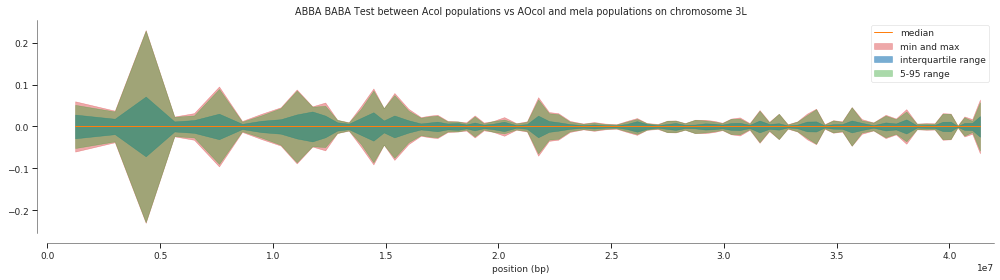

In [46]:
plot_test('3L', A,B,C,D, blen=100000)

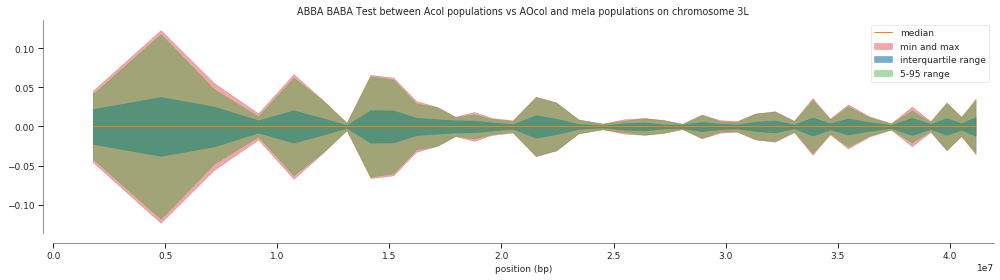

In [47]:
plot_test('3L', A,B,C,D, blen=200000)